In [143]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15, 8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [144]:
df = pd.read_excel('data_2/최종_merge.xlsx', index_col=0)

# 데이터 전처리

In [145]:
df.rename(columns={'화물명' : '기존화물명',
                  '화물명.1' : '적재화물명'}, inplace=True)
df

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,작업시간,입항일시,출항일시,...,고지금액,화물료,화물보안료,선사대리점,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수,기존화물명,적재화물명
0,아세안 메저스티호,DSMZ8,2012,1,1,1,71383,7.916667,2012-01-03 10:05:00,2012-01-03 18:00:00,...,"5,150","5,150",0,유코카캐리어스(주),2003,3,3356,1356,차량,차량
1,모닝쿠리어,C6UI2,2012,1,1,1,57692,12.916667,2012-01-06 07:30:00,2012-01-06 20:25:00,...,"457,050","457,050",0,유코카캐리어스(주),2347,347,3586,1586,차량,차량
2,MORNING LINDA,3ETI,2012,1,1,1,68701,13.500000,2012-01-07 07:20:00,2012-01-07 20:50:00,...,"13,060","13,060",0,현대글로비스주식회사,2018,18,5179,3179,차량,차량
3,GLOVIS PACIFIC,D8HO,2012,1,1,1,47367,26.916667,2012-01-11 07:50:00,2012-01-12 10:45:00,...,"21,520","21,520",0,현대글로비스주식회사,2015,15,3388,1388,차량,차량
4,MIGNON,SJCD,2012,1,1,1,67264,11.333333,2012-01-14 07:40:00,2012-01-14 19:00:00,...,"66,600","66,600",0,유코카캐리어스(주),2110,4,4028,2028,차량,차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,글로비스 썬,V7BC8,2021,7,2,0,65697,15.083333,2021-07-31 07:50:00,2021-07-31 22:55:00,...,"2,752,920","2,741,640","11,280",현대글로비스주식회사,4000,0,7393,3393,차량,차량
5377,VIKING DESTINY,V7HR6,2021,7,2,0,62105,55.833333,2021-07-31 12:10:00,2021-08-02 20:00:00,...,"2,762,090","2,674,800","87,290",현대글로비스주식회사,3088,123,7778,4690,차량,차량
5378,CSAV RIO NEVADO,D5DX5,2021,7,4,0,46800,10.083333,2021-07-31 12:25:00,2021-07-31 22:30:00,...,"2,361,840","2,361,840",0,현대글로비스주식회사,1709,0,4485,2776,차량,차량
5379,MORNING MIDAS,MMNA2,2021,8,1,0,46800,15.750000,2021-08-11 06:15:00,2021-08-11 22:00:00,...,"4,072,200","4,072,200",0,유코카캐리어스(주),0,0,4462,4462,empty,차량


In [146]:
# 돈 관련 문자열에서 ',' 제거 후 numeric으로 변환
for colname in ['고지금액', '화물료', '화물보안료']:
    df[colname] = df[colname].str.replace(',', '')
    df[colname] = pd.to_numeric(df[colname])

In [147]:
df.isnull().sum()

선명            0
호출부호          0
입항년도          0
입항월           0
입항횟수          0
입출            0
총톤수           0
작업시간          0
입항일시          0
출항일시          0
계선장소          0
계선장소.1        0
예선            0
도선            0
차항지           0
전출항지          0
선사번호          0
고지금액          0
화물료           0
화물보안료      4526
선사대리점         0
적재톤수          0
양하톤수          0
출항_적재톤수       0
출항_적하톤수       0
기존화물명         0
적재화물명         0
dtype: int64

In [148]:
a = df[['고지금액', '화물료', '화물보안료']]
a[a['화물보안료'].isnull()]

,고지금액,화물료,화물보안료
0,5150,5150,NaN
1,457050,457050,NaN
2,13060,13060,NaN
3,21520,21520,NaN
4,66600,66600,NaN
...,...,...,...
4145,2964960,2964960,NaN
4146,600120,600120,NaN
4147,981840,981840,NaN
4148,382920,382920,NaN


In [149]:
df['화물보안료'].fillna(0, inplace=True)
df.isnull().sum()

선명         0
호출부호       0
입항년도       0
입항월        0
입항횟수       0
입출         0
총톤수        0
작업시간       0
입항일시       0
출항일시       0
계선장소       0
계선장소.1     0
예선         0
도선         0
차항지        0
전출항지       0
선사번호       0
고지금액       0
화물료        0
화물보안료      0
선사대리점      0
적재톤수       0
양하톤수       0
출항_적재톤수    0
출항_적하톤수    0
기존화물명      0
적재화물명      0
dtype: int64

# 일변량 데이터 분석

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6175 entries, 0 to 5380
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   선명       6175 non-null   object        
 1   호출부호     6175 non-null   object        
 2   입항년도     6175 non-null   int64         
 3   입항월      6175 non-null   int64         
 4   입항횟수     6175 non-null   int64         
 5   입출       6175 non-null   int64         
 6   총톤수      6175 non-null   int64         
 7   작업시간     6175 non-null   float64       
 8   입항일시     6175 non-null   datetime64[ns]
 9   출항일시     6175 non-null   datetime64[ns]
 10  계선장소     6175 non-null   object        
 11  계선장소.1   6175 non-null   int64         
 12  예선       6175 non-null   int64         
 13  도선       6175 non-null   int64         
 14  차항지      6175 non-null   object        
 15  전출항지     6175 non-null   object        
 16  선사번호     6175 non-null   object        
 17  고지금액     6175 non-null   int64   

In [151]:
df.describe()

,입항년도,입항월,입항횟수,입출,총톤수,작업시간,계선장소.1,예선,도선,고지금액,화물료,화물보안료,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수
count,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6.175000e+03,6.175000e+03,6175.000000,6175.00000,6175.000000,6175.000000,6175.000000
mean,2016.126640,6.325668,2.335870,0.128583,56094.434332,31.137590,1.878866,0.988016,0.988178,2.060891e+06,2.056370e+06,4521.486640,1846.17587,214.300567,4253.938947,2727.258785
std,2.863399,3.399539,1.612703,0.334765,11197.276715,34.743110,0.765657,0.108821,0.108093,1.618710e+06,1.614990e+06,14595.278491,2106.77384,801.539341,2634.857597,12840.920808
min,2012.000000,1.000000,1.000000,0.000000,4464.000000,1.166667,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,29.000000,0.000000
25%,2014.000000,3.000000,1.000000,0.000000,49750.000000,9.541667,1.000000,1.000000,1.000000,8.365800e+05,8.327400e+05,0.000000,0.00000,0.000000,2184.000000,1000.000000
50%,2016.000000,6.000000,2.000000,0.000000,58767.000000,18.016667,2.000000,1.000000,1.000000,1.670130e+06,1.669220e+06,0.000000,2000.00000,0.000000,4097.000000,2100.000000
75%,2019.000000,9.000000,3.000000,0.000000,60876.000000,36.941667,2.000000,1.000000,1.000000,2.956080e+06,2.943490e+06,0.000000,2639.00000,1.000000,6187.000000,3612.000000
max,2021.000000,12.000000,13.000000,1.000000,76420.000000,382.500000,3.000000,1.000000,1.000000,1.100628e+07,1.100628e+07,186570.000000,43312.00000,43312.000000,49364.000000,999999.000000


In [152]:
df['기존화물명'].value_counts()

차량        3999
empty     2154
기계류          9
유기 화합물       5
선박           3
목재,목탄        2
철강제품         2
기타           1
Name: 기존화물명, dtype: int64

<AxesSubplot:xlabel='기존화물명', ylabel='count'>

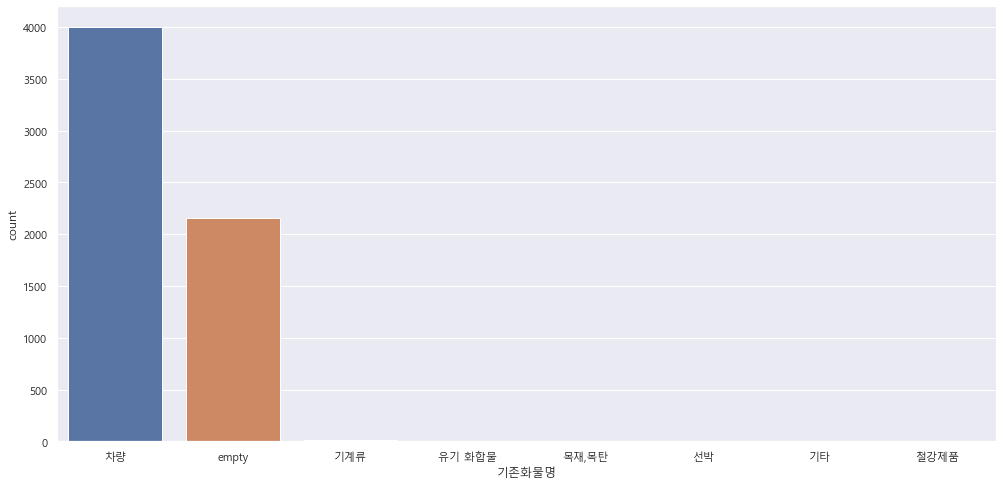

In [153]:
sns.countplot(df['기존화물명'])

In [154]:
# 적재화물명은 전부 차량이다.
df['적재화물명'].value_counts()

차량    6175
Name: 적재화물명, dtype: int64

<AxesSubplot:xlabel='입출', ylabel='count'>

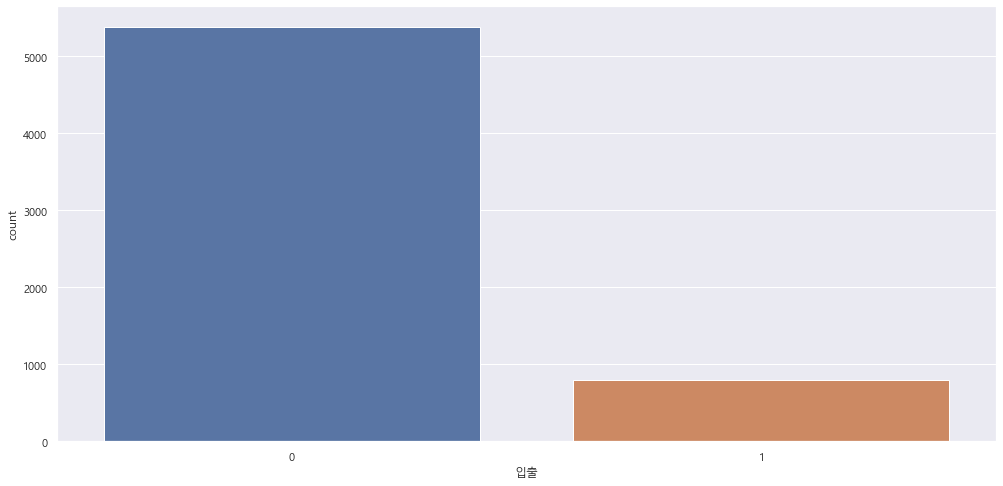

In [155]:
sns.countplot(df['입출'])

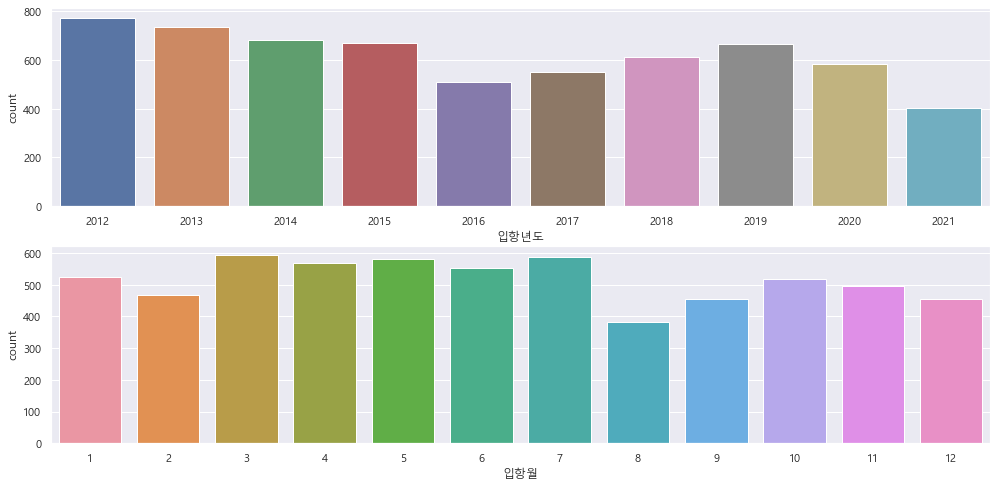

<Figure size 1440x1080 with 0 Axes>

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
sns.countplot(df['입항년도'], ax=axes[0])
sns.countplot(df['입항월'], ax=axes[1])
plt.figure(figsize=(20, 15))  # plot 크기 조정하는 건데 안 바뀌어서 모르겠음?? 왜 안 바뀌지......
plt.show()

In [157]:
df['예선'].value_counts()

1    6101
0      74
Name: 예선, dtype: int64

<AxesSubplot:xlabel='도선', ylabel='count'>

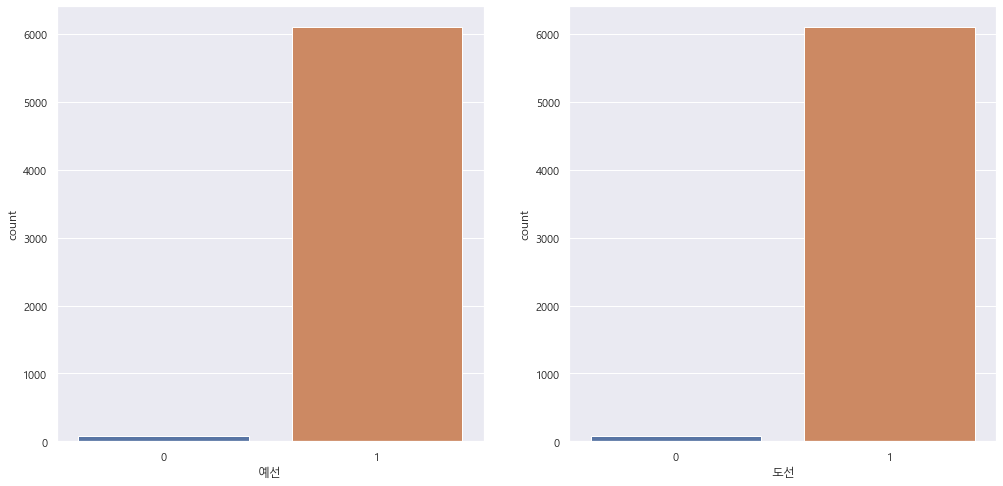

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.countplot(df['예선'], ax=axes[0])
sns.countplot(df['도선'], ax=axes[1])

<AxesSubplot:xlabel='작업시간', ylabel='Count'>

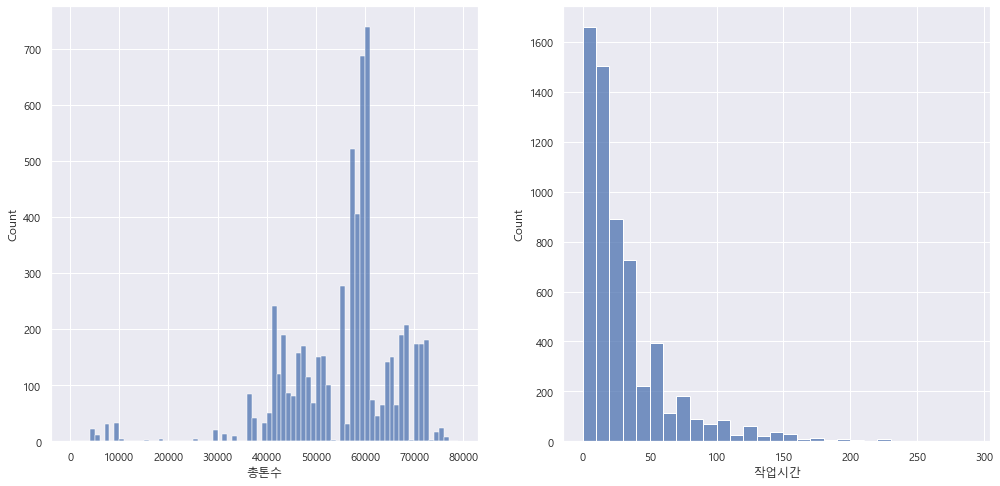

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.histplot(df['총톤수'], bins = range(0, 80000, 1000), ax=axes[0])
sns.histplot(df['작업시간'], bins=range(0, 300, 10), ax=axes[1])

<AxesSubplot:xlabel='출항_적재톤수', ylabel='Count'>

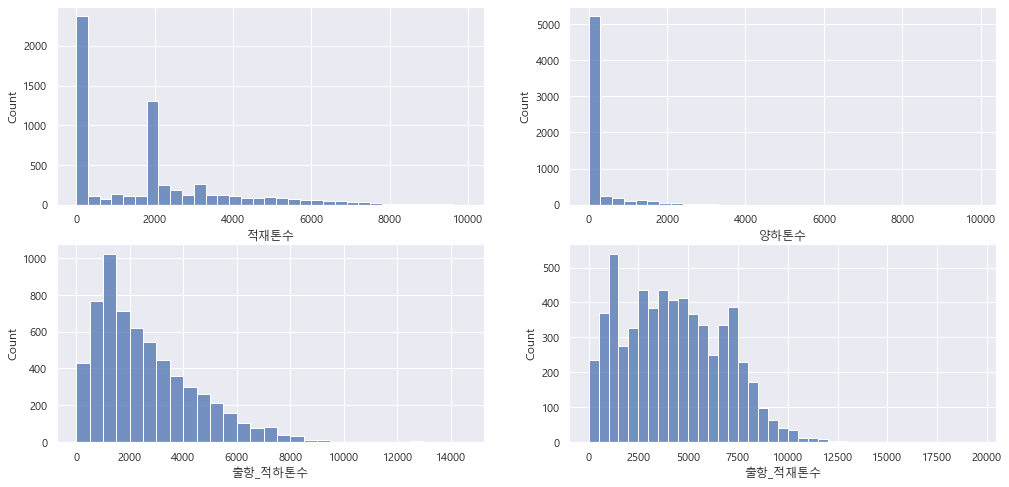

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
sns.histplot(data=df, x='적재톤수', bins=range(0, 10000, 300), ax=axes[0])
sns.histplot(data=df, x='양하톤수', bins=range(0, 10000, 300), ax=axes[1])
sns.histplot(data=df, x='출항_적하톤수', bins=range(0, 15000, 500), ax=axes[2])
sns.histplot(data=df, x='출항_적재톤수', bins=range(0, 20000, 500), ax=axes[3])

아래를 보면 알 수 있는 점\
EUKO: 유코카캐리어스(주)\
GLVS: 현대글로비스주식회사

<AxesSubplot:xlabel='선사대리점', ylabel='count'>

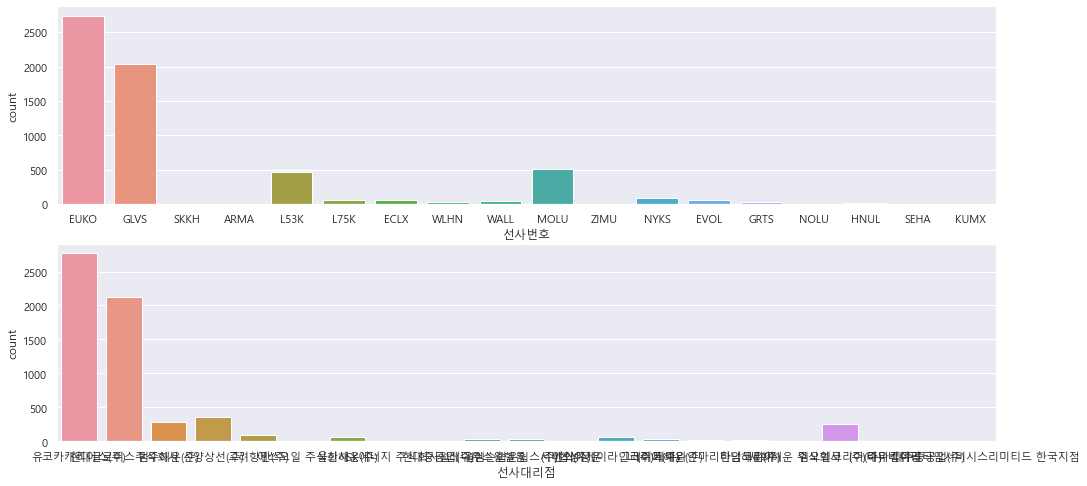

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
sns.countplot(df['선사번호'], ax=axes[0])
sns.countplot(df['선사대리점'], ax=axes[1])

<AxesSubplot:xlabel='고지금액', ylabel='Count'>

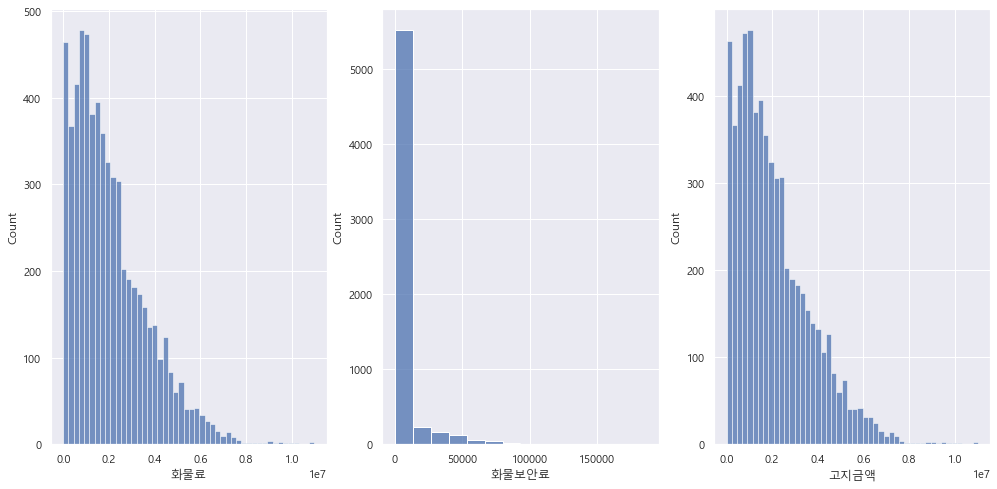

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()
sns.histplot(data=df, x='화물료', ax=axes[0])
sns.histplot(data=df, x='화물보안료', ax=axes[1])
sns.histplot(data=df, x='고지금액', ax=axes[2])

# 이변량 데이터 분석

In [163]:
df 

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,작업시간,입항일시,출항일시,...,고지금액,화물료,화물보안료,선사대리점,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수,기존화물명,적재화물명
0,아세안 메저스티호,DSMZ8,2012,1,1,1,71383,7.916667,2012-01-03 10:05:00,2012-01-03 18:00:00,...,5150,5150,0.0,유코카캐리어스(주),2003,3,3356,1356,차량,차량
1,모닝쿠리어,C6UI2,2012,1,1,1,57692,12.916667,2012-01-06 07:30:00,2012-01-06 20:25:00,...,457050,457050,0.0,유코카캐리어스(주),2347,347,3586,1586,차량,차량
2,MORNING LINDA,3ETI,2012,1,1,1,68701,13.500000,2012-01-07 07:20:00,2012-01-07 20:50:00,...,13060,13060,0.0,현대글로비스주식회사,2018,18,5179,3179,차량,차량
3,GLOVIS PACIFIC,D8HO,2012,1,1,1,47367,26.916667,2012-01-11 07:50:00,2012-01-12 10:45:00,...,21520,21520,0.0,현대글로비스주식회사,2015,15,3388,1388,차량,차량
4,MIGNON,SJCD,2012,1,1,1,67264,11.333333,2012-01-14 07:40:00,2012-01-14 19:00:00,...,66600,66600,0.0,유코카캐리어스(주),2110,4,4028,2028,차량,차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,글로비스 썬,V7BC8,2021,7,2,0,65697,15.083333,2021-07-31 07:50:00,2021-07-31 22:55:00,...,2752920,2741640,11280.0,현대글로비스주식회사,4000,0,7393,3393,차량,차량
5377,VIKING DESTINY,V7HR6,2021,7,2,0,62105,55.833333,2021-07-31 12:10:00,2021-08-02 20:00:00,...,2762090,2674800,87290.0,현대글로비스주식회사,3088,123,7778,4690,차량,차량
5378,CSAV RIO NEVADO,D5DX5,2021,7,4,0,46800,10.083333,2021-07-31 12:25:00,2021-07-31 22:30:00,...,2361840,2361840,0.0,현대글로비스주식회사,1709,0,4485,2776,차량,차량
5379,MORNING MIDAS,MMNA2,2021,8,1,0,46800,15.750000,2021-08-11 06:15:00,2021-08-11 22:00:00,...,4072200,4072200,0.0,유코카캐리어스(주),0,0,4462,4462,empty,차량


In [164]:
df.corr()

,입항년도,입항월,입항횟수,입출,총톤수,작업시간,계선장소.1,예선,도선,고지금액,화물료,화물보안료,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수
입항년도,1.000000,-0.033423,-0.129555,0.199799,0.238973,0.176733,0.016085,0.058931,0.060308,0.202423,0.199132,0.415690,0.224951,0.230851,0.324683,0.026072
입항월,-0.033423,1.000000,0.508132,-0.010472,0.012469,0.019625,0.003522,0.003546,-0.000100,0.028070,0.028334,-0.022060,0.018012,-0.004208,0.027013,0.008285
입항횟수,-0.129555,0.508132,1.000000,-0.007105,-0.163330,0.032401,-0.011251,0.022016,0.019065,-0.014021,-0.013441,-0.067758,0.038960,-0.019520,0.028910,-0.002537
입출,0.199799,-0.010472,-0.007105,1.000000,0.101304,0.160320,-0.032746,0.033413,0.033063,-0.193869,-0.196915,0.287691,0.172713,0.283325,0.179003,0.017015
총톤수,0.238973,0.012469,-0.163330,0.101304,1.000000,0.085721,0.018620,0.068084,0.055457,0.236979,0.236513,0.111907,0.277971,0.086288,0.392597,0.028411
작업시간,0.176733,0.019625,0.032401,0.160320,0.085721,1.000000,0.053741,0.024227,0.025028,0.522204,0.521448,0.216774,0.016515,0.274927,0.339209,0.073758
계선장소.1,0.016085,0.003522,-0.011251,-0.032746,0.018620,0.053741,1.000000,-0.023257,-0.025134,-0.071701,-0.071805,-0.006819,0.050079,0.006587,-0.034873,0.002716
예선,0.058931,0.003546,0.022016,0.033413,0.068084,0.024227,-0.023257,1.000000,0.965600,0.072104,0.071962,0.034121,0.067759,0.019751,0.090141,0.009312
도선,0.060308,-0.000100,0.019065,0.033063,0.055457,0.025028,-0.025134,0.965600,1.000000,0.070717,0.070574,0.033887,0.066903,0.019483,0.089048,0.009203
고지금액,0.202423,0.028070,-0.014021,-0.193869,0.236979,0.522204,-0.071701,0.072104,0.070717,1.000000,0.999962,0.259060,-0.069430,0.220446,0.425780,0.095598


<AxesSubplot:xlabel='화물료', ylabel='화물보안료'>

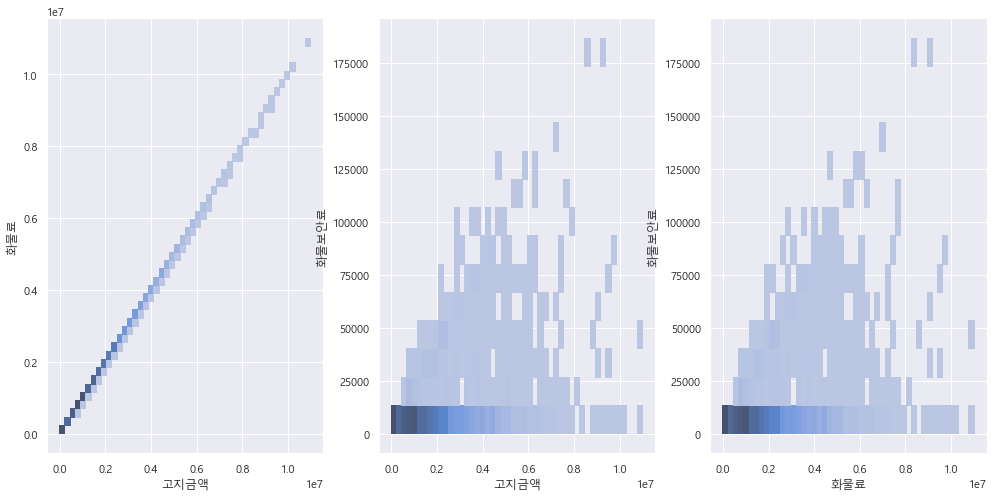

In [165]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()
sns.histplot(x=df['고지금액'], y=df['화물료'], ax=axes[0])
sns.histplot(x=df['고지금액'], y=df['화물보안료'], ax=axes[1])
sns.histplot(x=df['화물료'], y=df['화물보안료'], ax=axes[2])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='출항_적재톤수', ylabel='화물료'>

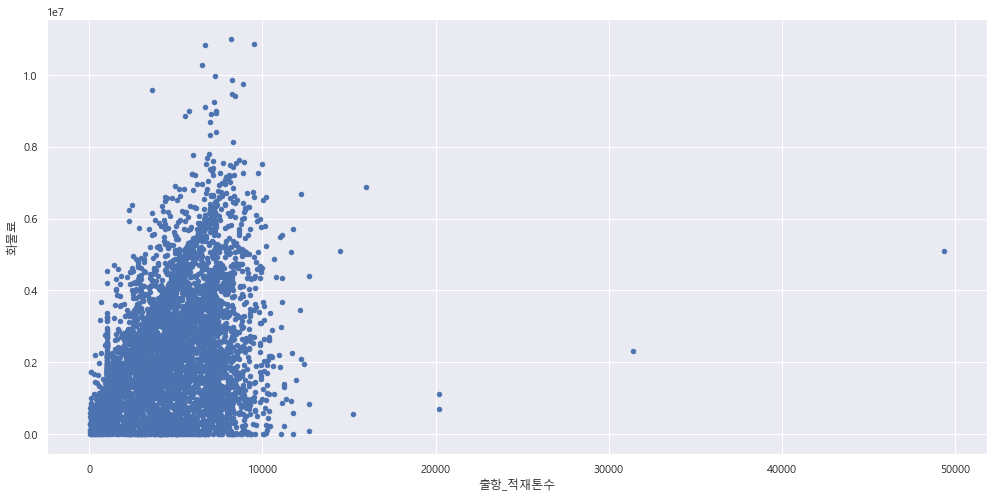

In [166]:
df.plot(x='출항_적재톤수',y='화물료', kind = 'scatter')

<AxesSubplot:>

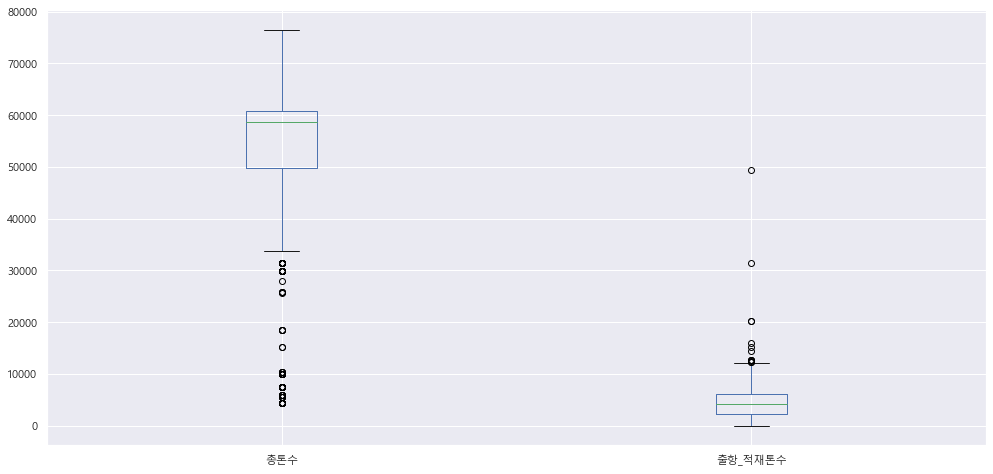

In [167]:
df[['총톤수','출항_적재톤수']].plot(kind='box')

# 선형 회귀분석

In [168]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [169]:
df.corr()['작업시간']

입항년도       0.176733
입항월        0.019625
입항횟수       0.032401
입출         0.160320
총톤수        0.085721
작업시간       1.000000
계선장소.1     0.053741
예선         0.024227
도선         0.025028
고지금액       0.522204
화물료        0.521448
화물보안료      0.216774
적재톤수       0.016515
양하톤수       0.274927
출항_적재톤수    0.339209
출항_적하톤수    0.073758
Name: 작업시간, dtype: float64

In [170]:
X = df[['입항년도', '고지금액', '화물료', '화물보안료', '양하톤수', '출항_적재톤수', '출항_적하톤수']]  #변수 지정
y = df[['작업시간']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # random_state 인자를 동일하게 하면 동일하게 분리

In [171]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #로지스틱 회귀분석 시행

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train) #모델의 정확도 확인

# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

[325.75674734]
[[-1.59979844e-01 -1.11100844e-05  1.55302077e-05 -2.66402892e-05
   1.14450403e-02  1.84921426e-05  6.60646208e-03]]


In [172]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)
#여기에 작업자 수, 입출항차이 시간이 아닌 실제 작업에 소요되는 시간의 데이터를 입력한다면 더욱 정확한 예측이 가능할 것이다.

Mean_Asolute_Error: 20.537922178682173
Mean_Squared_Error : 24330.700414450737
r_square_value : -20.368606712463777


R^2값이 0.28~0.3 사이로 나옴\
좋지 않음..\
원자료에 대한 회귀선의 설명력

### y값 작업시간 로그변환

<AxesSubplot:xlabel='작업시간', ylabel='Density'>

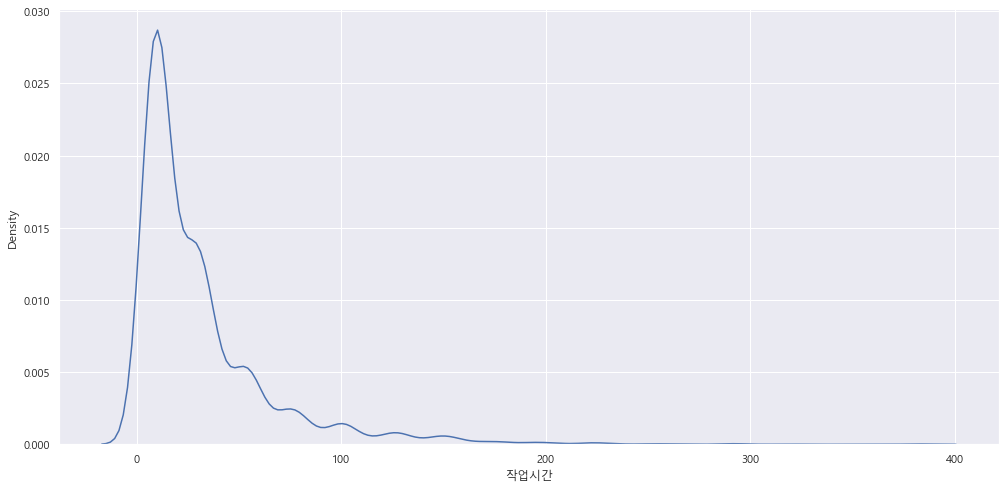

In [173]:
sns.kdeplot(df['작업시간'])

<AxesSubplot:xlabel='작업시간', ylabel='Density'>

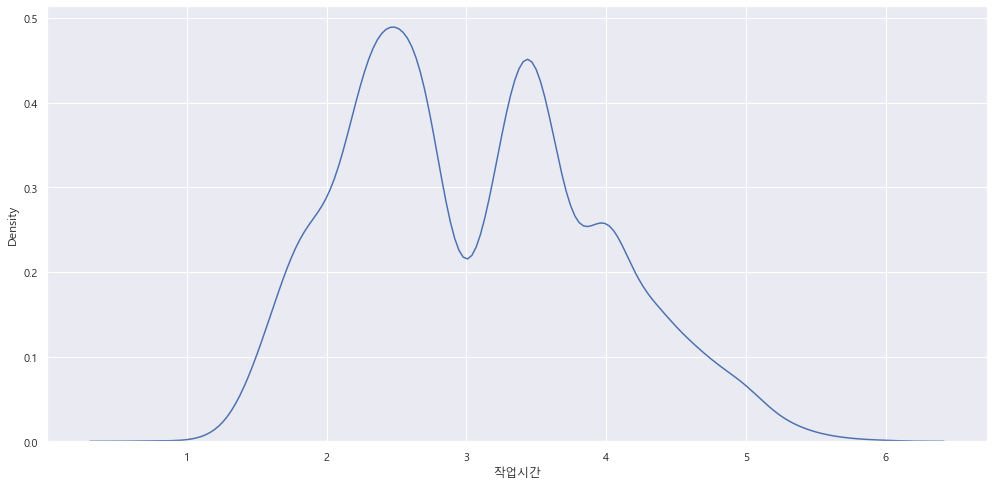

In [174]:
sns.kdeplot(np.log1p(df['작업시간']))

In [175]:
X = df[['입항년도', '고지금액', '화물료', '화물보안료', '양하톤수', '출항_적재톤수', '출항_적하톤수']]  #변수 지정
y = np.log1p(df['작업시간'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [176]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #로지스틱 회귀분석 시행

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train) #모델의 정확도 확인

# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

-21.352007964859197
[ 1.16987435e-02  8.73892423e-07 -6.21966557e-07  1.49585891e-06
  1.13584800e-04  6.38524698e-05  7.59075761e-07]


In [177]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Asolute_Error: 0.5598125155405298
Mean_Squared_Error : 0.4724383078099699
r_square_value : 0.4141632277042586


결정계수 r^2 값이 0.35~0.4정도로 나옴\
10% 늘음

# 다중공선성 확인

In [178]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

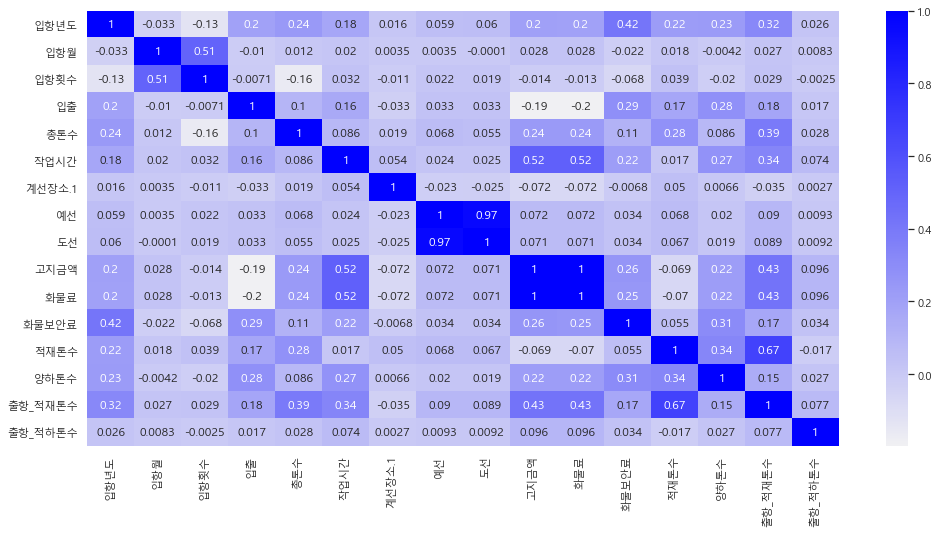

In [179]:
# 상관행렬 시각화
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("blue", as_cmap = True)  
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

상관계수가 0.5가 넘는게 거의 없음\
다중공선성 문제가 없다고 생각됨.

In [180]:
# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = df[['고지금액', '화물료', '화물보안료', '양하톤수', '출항_적재톤수', '출항_적하톤수']] #변수 여러개
target = df[["작업시간"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   작업시간   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     568.5
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:17:27   Log-Likelihood:                -29500.
No. Observations:                6175   AIC:                         5.901e+04
Df Residuals:                    6169   BIC:                         5.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2489      0.736      4.416      0.000       1.807       4.691
고지금액         3.59e-05   8.98e-06      4.000      0.000    1.83e-05    5.35e-05
화물료        -2.684e-05   9.02e-06     -2.976      0.003   -4.45e-05   -9.16e-06
화물보안료       6.274e-05    1.8e-05      3.487      0.000    2.75e-05     9.8e-05
양하톤수           0.0065      0.000     13.427      0.000       0.006       0.007
출항_적재톤수        0.0017      0.000     11.086      0.000       0.001       0.002
출항_적하톤수     4.874e-05   2.87e-05      1.701      0.089   -7.43e-06       0.000
==============================================================================
Omnibus:                     4095.890   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73478.320
Skew:                           2.927   Prob(JB):                         0.00
Kurtosis:                      18.853   Cond. No.                     9.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.42e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 왜도 첨도 확인

In [181]:
numerical_feats = df.dtypes[(df.dtypes != "object") & (df.dtypes != "datetime64[ns]")].index
print("Number of Numerical features: ", len(numerical_feats))
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  16
Number of Categorical features:  9


In [182]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          ' ' , 
          'Kurtosis: {:06.2f}'.format(df[col].kurt()) 
         )

입항년도            Skewness: 00.11   Kurtosis: -01.26
입항월             Skewness: 00.09   Kurtosis: -01.18
입항횟수            Skewness: 01.76   Kurtosis: 004.44
입출              Skewness: 02.22   Kurtosis: 002.93
총톤수             Skewness: -1.43   Kurtosis: 004.09
작업시간            Skewness: 02.83   Kurtosis: 012.09
계선장소.1          Skewness: 00.21   Kurtosis: -01.27
예선              Skewness: -8.97   Kurtosis: 078.52
도선              Skewness: -9.04   Kurtosis: 079.67
고지금액            Skewness: 01.17   Kurtosis: 001.57
화물료             Skewness: 01.17   Kurtosis: 001.56
화물보안료           Skewness: 04.37   Kurtosis: 024.29
적재톤수            Skewness: 02.73   Kurtosis: 030.74
양하톤수            Skewness: 26.90   Kurtosis: 1362.25
출항_적재톤수         Skewness: 01.33   Kurtosis: 015.25
출항_적하톤수         Skewness: 75.91   Kurtosis: 5895.30


출항_적하톤수, 출항_적재톤수, 적재톤수의\
왜도, 첨도가 높게 나와서 정규화를 시켜주고 싶다

<AxesSubplot:xlabel='출항_적하톤수', ylabel='Count'>

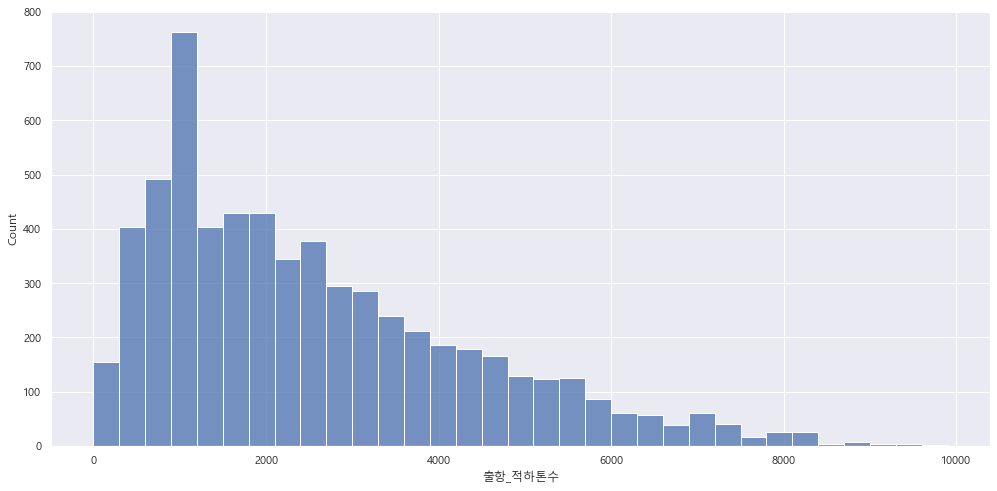

In [187]:
sns.histplot(df['출항_적하톤수'], bins=range(0, 10000, 300))

<AxesSubplot:xlabel='출항_적하톤수', ylabel='Density'>

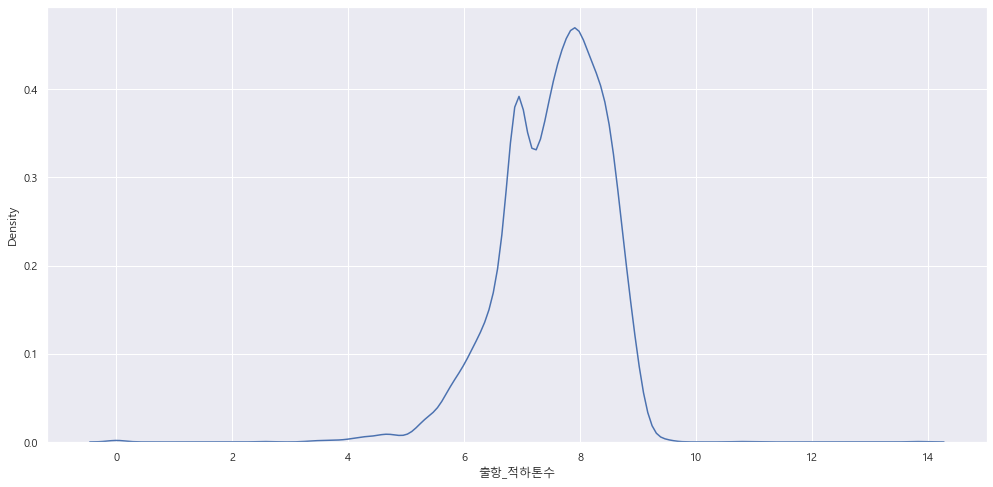

In [194]:
sns.kdeplot(np.log1p(df['출항_적하톤수']))

In [220]:
log_df = df.copy()
for col in ["적재톤수", "출항_적하톤수", "출항_적재톤수"]:
    log_df[col] = np.log1p(log_df[col])

In [245]:
log_df.corr()['작업시간']

입항년도       0.176733
입항월        0.019625
입항횟수       0.032401
입출         0.160320
총톤수        0.085721
작업시간       1.000000
계선장소.1     0.053741
예선         0.024227
도선         0.025028
고지금액       0.522204
화물료        0.521448
화물보안료      0.216774
적재톤수       0.115381
양하톤수       0.274927
출항_적재톤수    0.324010
출항_적하톤수    0.474538
Name: 작업시간, dtype: float64

# 설명변수의 log변환 후 모델 성능 확인

In [246]:
X = log_df[['입항년도', '입출', '고지금액', '화물료', '화물보안료', '적재톤수', '양하톤수', '출항_적재톤수', '출항_적하톤수']]  #변수 지정
y = np.log1p(log_df['작업시간']) # y값도 log변환 시켜줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [247]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #로지스틱 회귀분석 시행

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train) #모델의 정확도 확인

# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

-28.480829997726797
[ 1.43096256e-02  5.16003300e-01 -2.48551452e-07  4.71269191e-07
 -7.20081621e-07  2.25562508e-02  4.94472912e-05 -1.10496501e-01
  3.88197714e-01]


In [248]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Asolute_Error: 0.49626000570022766
Mean_Squared_Error : 0.38955828432795403
r_square_value : 0.4936260628068544


결정계수값이 많이 올라간 것을 확인할 수 있음!

# random forest

In [249]:
def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = 100 - (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    return mape


def RMSPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    rmspe = 100 - (np.sqrt(np.mean(((y_test - y_pred) / y_test)**2))*100)
    return rmspe

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('r2 :', r2)
    return r2

In [252]:
X = log_df[['입항년도', '입출', '고지금액', '화물료', '화물보안료', '적재톤수', '양하톤수', '출항_적재톤수', '출항_적하톤수']]  #변수 지정
y = np.log1p(log_df['작업시간']) # y값도 log변환 시켜줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) # random_state 인자를 동일하게 하면 동일하게 분리

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 83)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r_squared_rf = r2_score(y_test, y_pred_rf)
mape_rf = MAPE(y_test, y_pred_rf)
rmspe_rf = RMSPE(y_test, y_pred_rf)

print('### RandomForest Regressor Metrics ###')
print('Mean_Absolute_Erro :' ,mae_rf)
print('Root_Mean_Squared_Error :' ,rmse_rf)
print('R_Square_value :',r_squared_rf)
print('Mean_Absolute_Percentage_Error :', mape_rf)
print('Root Relative squared Error :', rmspe_rf)
#y:입출항 소요시간 x:적하톤수, 양하톤수, 출항시 배의 적재톤수, 배의 총톤수, 년도
#여기에 작업자 수, 입출항차이 시간이 아닌 실제 작업에 소요되는 시간의 데이터를 입력한다면 더욱 정확한 예측이 가능할 것이다.

### RandomForest Regressor Metrics ###
Mean_Absolute_Erro : 0.4905188713464935
Root_Mean_Squared_Error : 0.6259219322170888
R_Square_value : 0.5195799091943425
Mean_Absolute_Percentage_Error : 82.80912177113788
Root Relative squared Error : 77.67912476740858


No handles with labels found to put in legend.


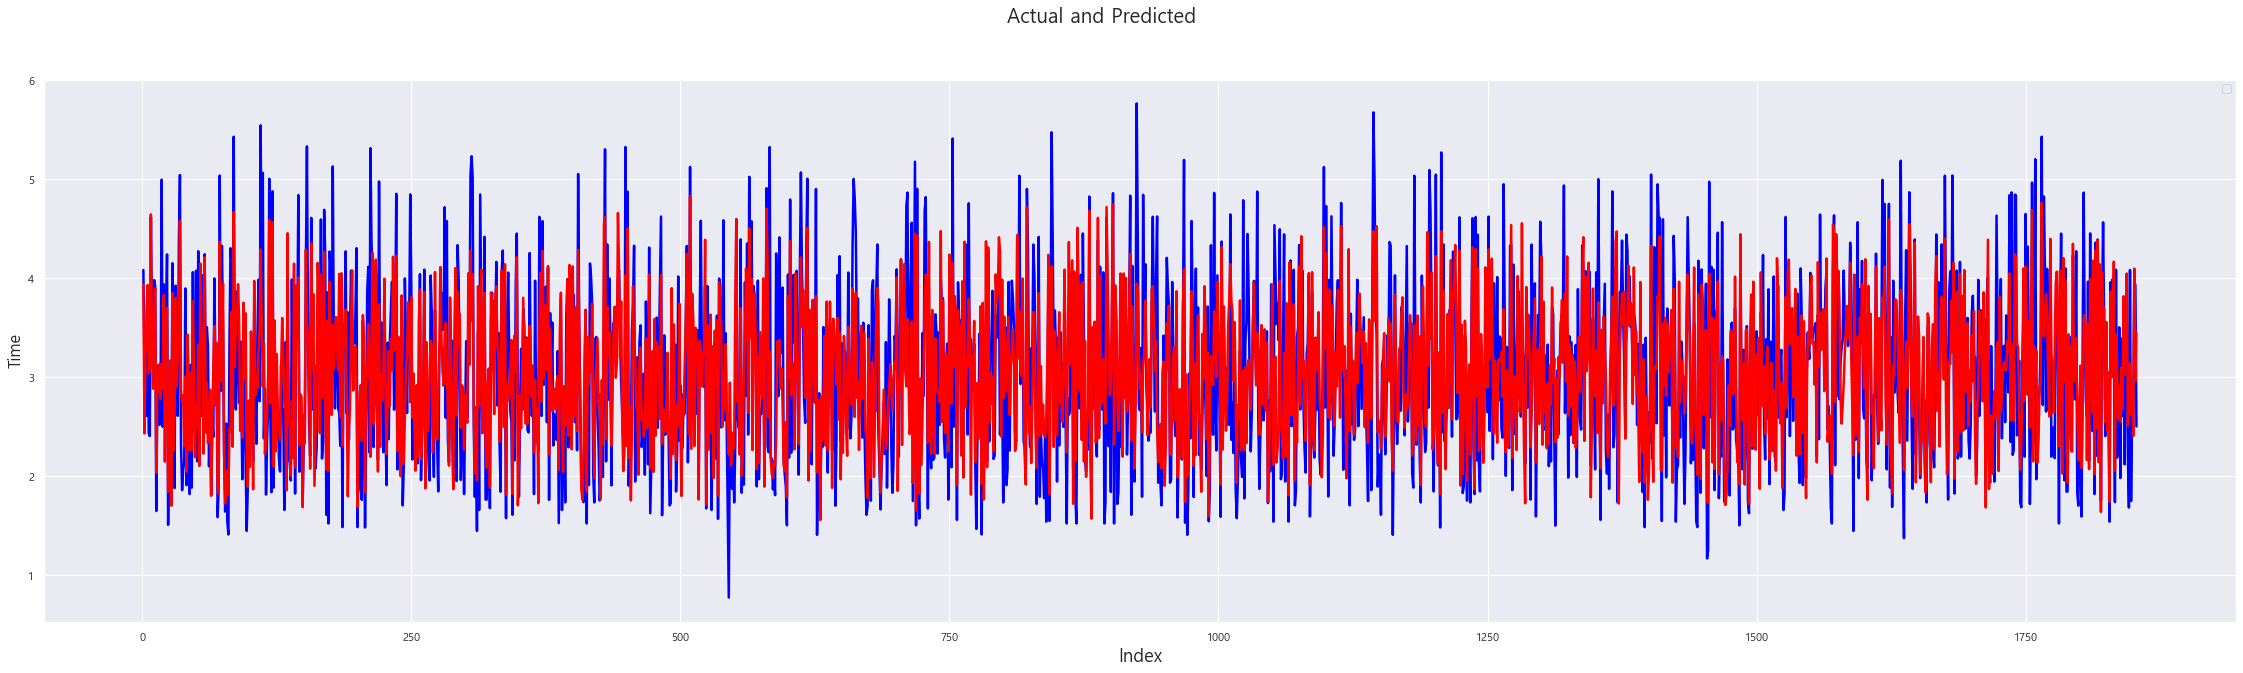

In [254]:
#Actual vs Predicted
c = [i for i in range(1,1854,1)]
fig = plt.figure(figsize=(35,10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
c = [i for i in range(1,1854,1)]
plt.plot(c,y_pred_rf, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.legend()
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Time', fontsize=16)                               # Y-label
plt.show()

Text(0, 0.5, 'ytest-ypred')

<Figure size 1080x576 with 0 Axes>

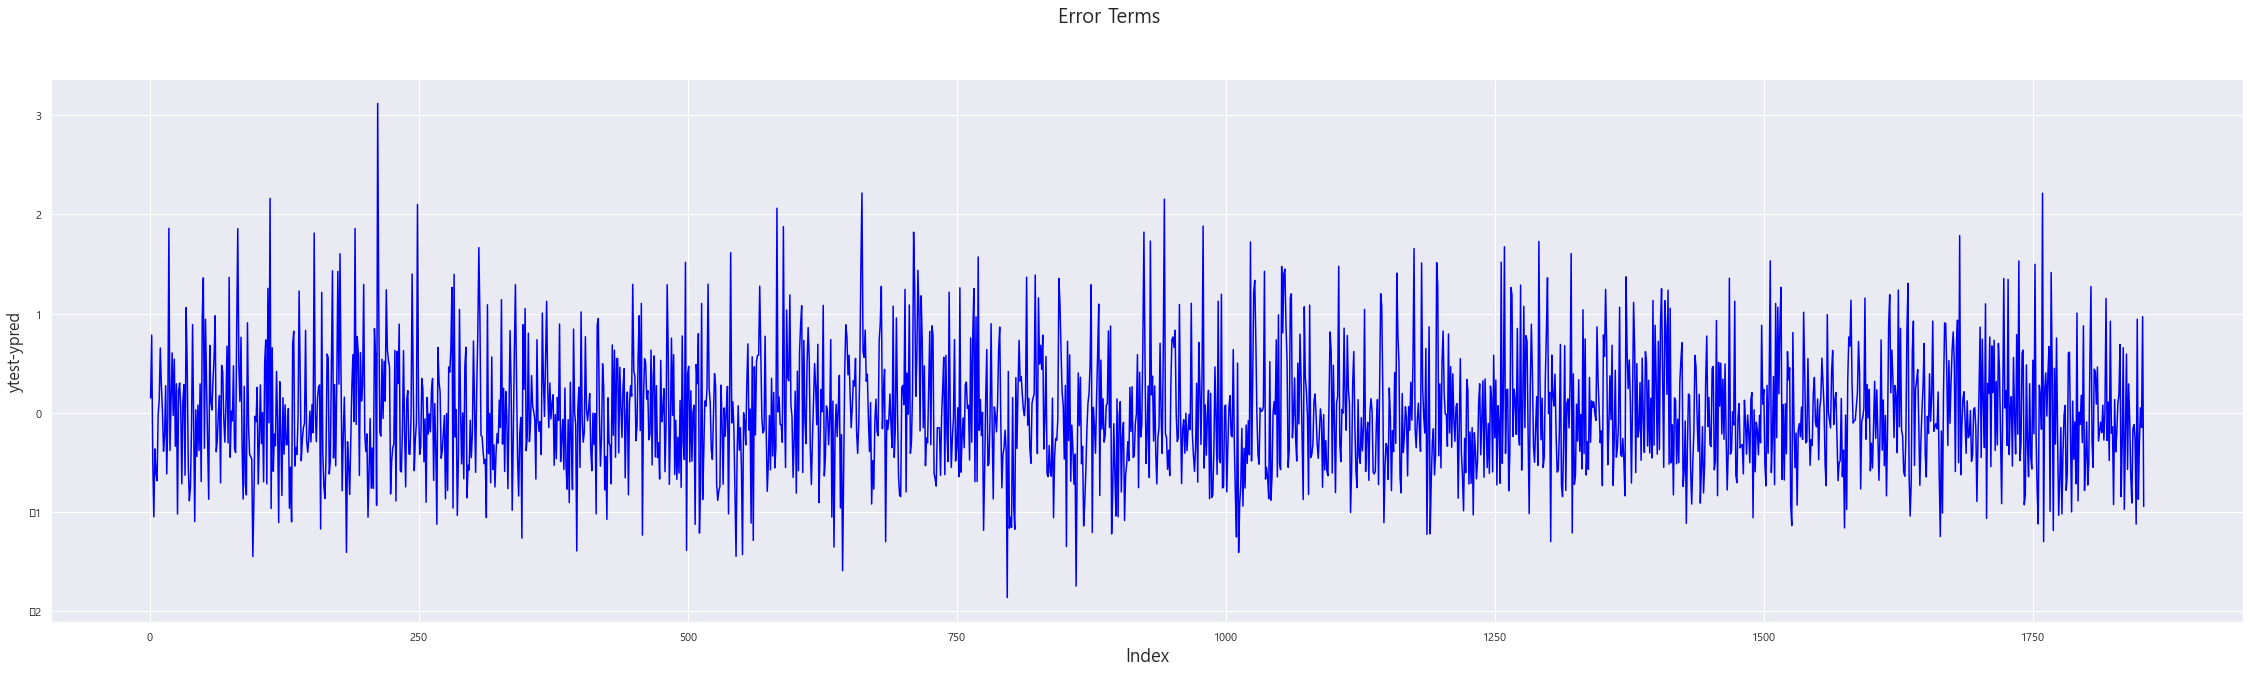

In [255]:
# Error terms
fig = plt.figure()
fig = plt.figure(figsize=(35,10))
plt.plot(c,y_test-y_pred_rf, color="blue", linewidth=1.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

# XGBoost

In [256]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X)
new_X = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=143) # random_state 인자를 동일하게 하면 동일하게 분리

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)
y_pred

r_sq = xgb_model.score(X_test, y_test)
mse_rf = (mean_squared_error(y_test, y_pred))
# print(explained_variance_score(y_pred,y_test))
print('Mean_Squared_Error',mse_rf)
print('R_Squared:',r_sq)

4322 1853
Mean_Squared_Error 0.3688764581475759
R_Squared: 0.5414842356185708


No handles with labels found to put in legend.


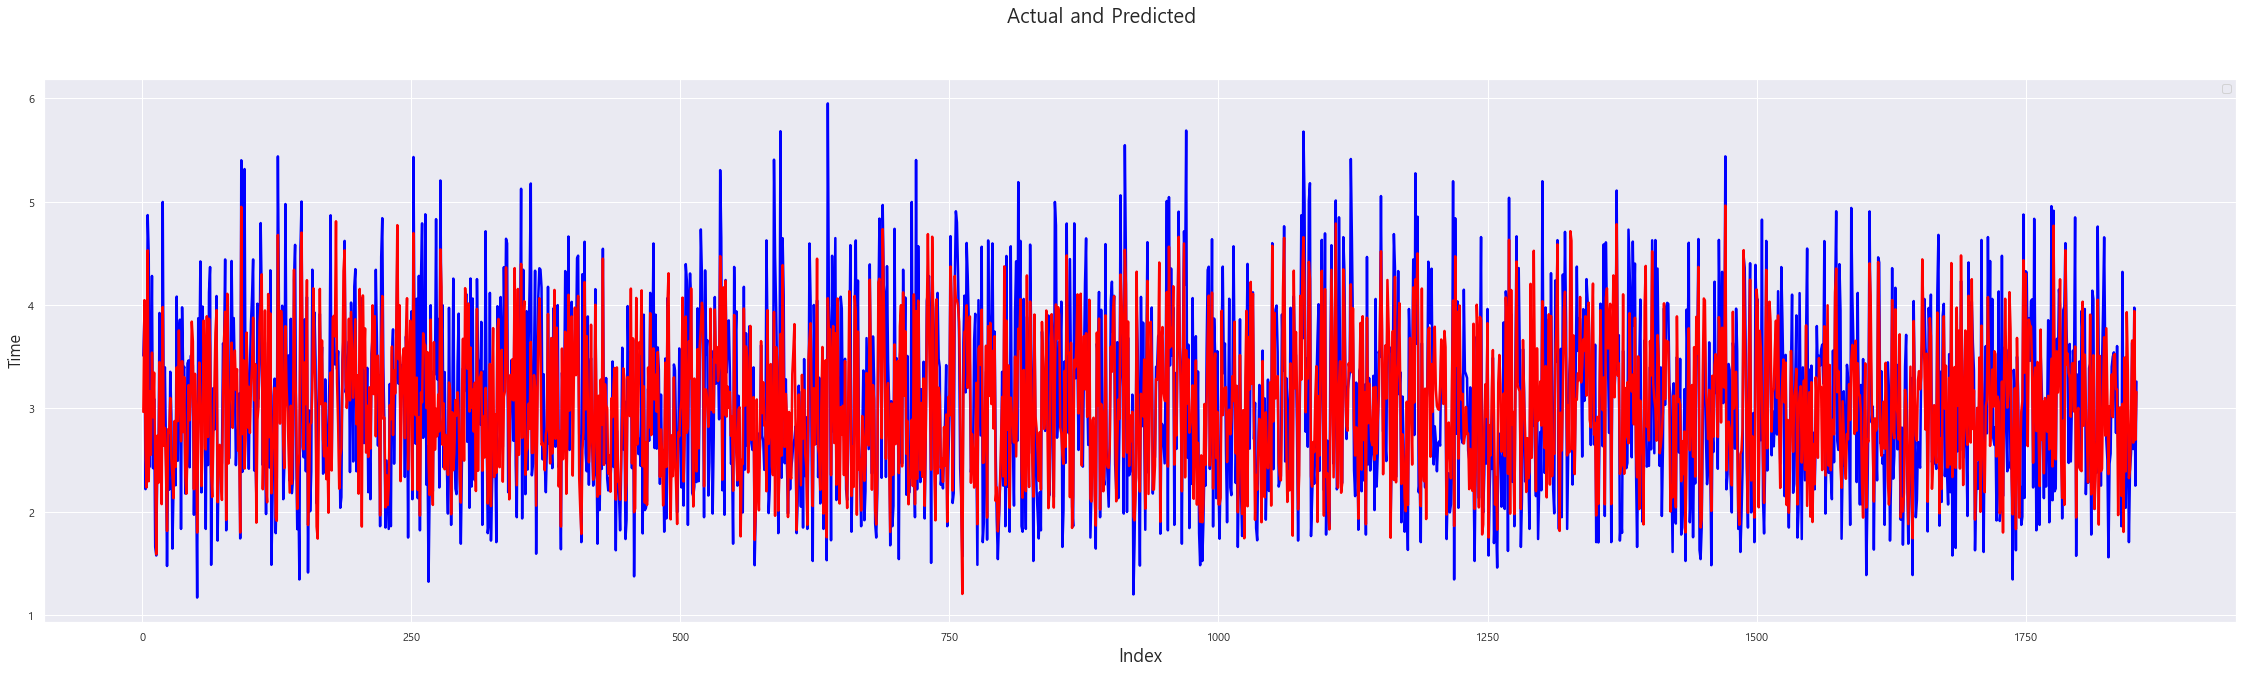

In [257]:
#Actual vs Predicted
c = [i for i in range(1,1854,1)]
fig = plt.figure(figsize=(35,10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
c = [i for i in range(1,1854,1)]
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.legend()
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Time', fontsize=16)                               # Y-label
plt.show()

In [258]:
df

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,작업시간,입항일시,출항일시,...,고지금액,화물료,화물보안료,선사대리점,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수,기존화물명,적재화물명
0,아세안 메저스티호,DSMZ8,2012,1,1,1,71383,7.916667,2012-01-03 10:05:00,2012-01-03 18:00:00,...,5150,5150,0.0,유코카캐리어스(주),2003,3,3356,1356,차량,차량
1,모닝쿠리어,C6UI2,2012,1,1,1,57692,12.916667,2012-01-06 07:30:00,2012-01-06 20:25:00,...,457050,457050,0.0,유코카캐리어스(주),2347,347,3586,1586,차량,차량
2,MORNING LINDA,3ETI,2012,1,1,1,68701,13.500000,2012-01-07 07:20:00,2012-01-07 20:50:00,...,13060,13060,0.0,현대글로비스주식회사,2018,18,5179,3179,차량,차량
3,GLOVIS PACIFIC,D8HO,2012,1,1,1,47367,26.916667,2012-01-11 07:50:00,2012-01-12 10:45:00,...,21520,21520,0.0,현대글로비스주식회사,2015,15,3388,1388,차량,차량
4,MIGNON,SJCD,2012,1,1,1,67264,11.333333,2012-01-14 07:40:00,2012-01-14 19:00:00,...,66600,66600,0.0,유코카캐리어스(주),2110,4,4028,2028,차량,차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,글로비스 썬,V7BC8,2021,7,2,0,65697,15.083333,2021-07-31 07:50:00,2021-07-31 22:55:00,...,2752920,2741640,11280.0,현대글로비스주식회사,4000,0,7393,3393,차량,차량
5377,VIKING DESTINY,V7HR6,2021,7,2,0,62105,55.833333,2021-07-31 12:10:00,2021-08-02 20:00:00,...,2762090,2674800,87290.0,현대글로비스주식회사,3088,123,7778,4690,차량,차량
5378,CSAV RIO NEVADO,D5DX5,2021,7,4,0,46800,10.083333,2021-07-31 12:25:00,2021-07-31 22:30:00,...,2361840,2361840,0.0,현대글로비스주식회사,1709,0,4485,2776,차량,차량
5379,MORNING MIDAS,MMNA2,2021,8,1,0,46800,15.750000,2021-08-11 06:15:00,2021-08-11 22:00:00,...,4072200,4072200,0.0,유코카캐리어스(주),0,0,4462,4462,empty,차량


In [259]:
print( " 이 승희는 바보다")

 이 승희는 바보다
